In [459]:
import pandas as pd
import numpy as np
from nltk.tokenize import RegexpTokenizer
import nltk
from sklearn import metrics

import matplotlib.pyplot as plt

In [458]:
#nltk.download()

In [8]:
data=pd.read_csv('~/Asigmo/AI Ethics/train_humour.csv')

In [11]:
data.text

0       TENNESSEE: We're the best state. Nobody even c...
1       A man inserted an advertisement in the classif...
2       How many men does it take to open a can of bee...
3       Told my mom I hit 1200 Twitter followers. She ...
4       Roses are dead. Love is fake. Weddings are bas...
                              ...                        
7995    Lack of awareness of the pervasiveness of raci...
7996      Why are aspirins white? Because they work sorry
7997    Today, we Americans celebrate our independence...
7998    How to keep the flies off the bride at an Ital...
7999    "Each ounce of sunflower seeds gives you 37% o...
Name: text, Length: 8000, dtype: object

In [12]:
data.sample(20)

,id,text,is_humor,humor_rating,humor_controversy,offense_rating
7968,7969,I saw a guy walking 4 dogs this morning and th...,1,2.00,1.0,0.55
7702,7703,BOOK: She gazed upon the sun-dappled lawn. ME:...,1,1.76,1.0,0.00
6100,6101,Pandas show little interest in company or frie...,0,NaN,NaN,0.00
3986,3987,The word 'infant' originates from the Latin wo...,0,NaN,NaN,0.10
7388,7389,"""The spaces between us, keep getting deeper.' ...",0,NaN,NaN,0.00
7189,7190,Don't chase anyone. Don't beg anyone to stay. ...,0,NaN,NaN,0.00
7838,7839,"Verily, the land does not make anyone holy; it...",0,NaN,NaN,0.00
3646,3647,"Let's talk about sax, baby Let's talk about br...",1,2.38,0.0,0.00
7771,7772,My girlfriends threatened to leave me because ...,1,2.32,0.0,0.00
4973,4974,I thought I won the argument with my wife as t...,1,2.60,1.0,0.00


/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([  14.,   49.,  157.,  488., 1048., 1219., 1157.,  630.,  152.,
          18.]),
 array([0.1 , 0.49, 0.88, 1.27, 1.66, 2.05, 2.44, 2.83, 3.22, 3.61, 4.  ]),
 <a list of 10 Patch objects>)

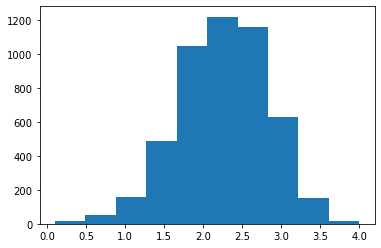

In [13]:
plt.hist(data.humor_rating)

(array([3068.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        4932.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

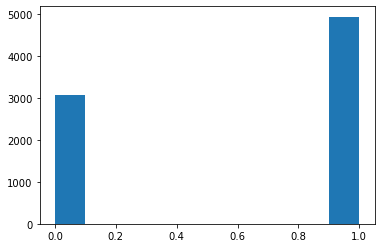

In [14]:
plt.hist(data.is_humor)

In [401]:
#data[data.is_humor==0]

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8000 non-null   int64  
 1   text               8000 non-null   object 
 2   is_humor           8000 non-null   int64  
 3   humor_rating       4932 non-null   float64
 4   humor_controversy  4932 non-null   float64
 5   offense_rating     8000 non-null   float64
dtypes: float64(3), int64(2), object(1)
memory usage: 375.1+ KB


In [17]:
#data.humor_rating.fillna(value = 0, inplace=True)

In [400]:
data.describe()

,id,is_humor,humor_rating,humor_controversy,offense_rating
count,8000.00000,8000.000000,8000.000000,4932.000000,8000.000000
mean,4000.50000,0.616500,1.393614,0.499797,0.585325
std,2309.54541,0.486269,1.185941,0.500051,0.979955
min,1.00000,0.000000,0.000000,0.000000,0.000000
25%,2000.75000,0.000000,0.000000,0.000000,0.000000
50%,4000.50000,1.000000,1.760000,0.000000,0.100000
75%,6000.25000,1.000000,2.420000,1.000000,0.700000
max,8000.00000,1.000000,4.000000,1.000000,4.850000


In [19]:
df=data.drop(columns=['humor_controversy','id'], axis=1)
df.head()

,text,is_humor,humor_rating,offense_rating
0,TENNESSEE: We're the best state. Nobody even c...,1,2.42,0.2
1,A man inserted an advertisement in the classif...,1,2.50,1.1
2,How many men does it take to open a can of bee...,1,1.95,2.4
3,Told my mom I hit 1200 Twitter followers. She ...,1,2.11,0.0
4,Roses are dead. Love is fake. Weddings are bas...,1,2.78,0.1


### Tokenizers

In [ ]:
tokenizer = nltk.tokenize.WhitespaceTokenizer()
tokenizer.tokenize(text)

tokenizer = nltk.tokenize.TreebankWordTokenizer()
tokenizer.tokenize(text)

tokenizer = nltk.tokenize.WordPunctTokenizer()
tokenizer.tokenize(text)

## Split dataset

In [501]:
from sklearn.model_selection import train_test_split

y_humor = df['is_humor']
X_humor = df.drop(columns='is_humor')
X_humor.text = X_humor.text.str.lower()
X_humor_train, X_humor_test, y_humor_train, y_humor_test = train_test_split\
                                            (X_humor, y_humor, test_size = 0.2, random_state=101, shuffle=True)

In [502]:
X_humor_train.head()

,text,humor_rating,offense_rating
5360,just because people do horrible things... it d...,0.00,0.00
5808,did you hear about the asian kid who had that ...,2.00,1.90
5297,"the wife has piled on the pounds of late, last...",2.20,1.65
7525,my new girlfriend works at the zoo. i think sh...,3.16,0.00
780,what do you call a mushroom who strongly belie...,2.20,1.40


## Stopwords

In [503]:
with open('/Users/festo.owiny/Asigmo/hahackathon/pos_neg_list/stopwords.txt') as f:
    stop_words = [line.rstrip() for line in f]

In [504]:
def stopworder(df):
    stop_list = df['text'].apply(lambda x: [item for item in x.split() if item not in stop_words])
    stop_sentence = stop_list.apply(lambda x : " ".join(x))
    return (stop_sentence)

In [505]:
stop_train = stopworder(X_humor_train).tolist()

X_humor_train.reset_index(drop=True, inplace=True)
X_humor_train.insert(1, "stop_sentence", stop_train, True)
X_humor_train.head()

,text,stop_sentence,humor_rating,offense_rating
0,just because people do horrible things... it d...,just people do horrible things... doesn't alwa...,0.00,0.00
1,did you hear about the asian kid who had that ...,did hear asian kid one night stand? too many b...,2.00,1.90
2,"the wife has piled on the pounds of late, last...","wife piled pounds late, last night came home w...",2.20,1.65
3,my new girlfriend works at the zoo. i think sh...,new girlfriend works zoo. think keeper.,3.16,0.00
4,what do you call a mushroom who strongly belie...,do call mushroom strongly believes radical isl...,2.20,1.40


In [491]:
stop_test = stopworder(X_humor_test).tolist()

X_humor_test.reset_index(drop=True, inplace=True)
X_humor_test.insert(1, "stop_sentence", stop_test, True)
X_humor_test.head()

,text,stop_sentence,humor_rating,offense_rating
0,what do you call a muslim woman without a burk...,do call muslim woman without burka? dead.,2.17,3.5
1,"last night in bed, my wife said we should try ...","last night bed, wife said try role reversal. t...",2.55,0.4
2,educator and feminist jackie anderson was a po...,educator feminist jackie anderson powerhouse l...,0.00,0.0
3,house reno question! does anyone know of a goo...,house reno question! does anyone know good mos...,0.00,0.0
4,"the issue is complex, but one thing is clear. ...","issue complex, one thing clear. 's better unde...",0.00,0.0


## Stemming

In [395]:
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer

In [396]:
#create an object of class PorterStemmer
porter = PorterStemmer()
lancaster=LancasterStemmer()
#proide a word to be stemmed
print("Porter Stemmer")
print(porter.stem("cats"))
print(porter.stem("trouble"))
print(porter.stem("troubling"))
print(porter.stem("troubled"))
print("Lancaster Stemmer")
print(lancaster.stem("cats"))
print(lancaster.stem("trouble"))
print(lancaster.stem("troubling"))
print(lancaster.stem("troubled"))

Porter Stemmer
cat
troubl
troubl
troubl
Lancaster Stemmer
cat
troubl
troubl
troubl


In [506]:
def stemmmer(df):
    stemmed = (df['text'].str.split()).apply(lambda x : [porter.stem(y) for y in x])
    stemmed_sentence = stemmed.apply(lambda x : " ".join(x))
    return (stemmed_sentence)

In [507]:
stemmed_train = stemmmer(X_humor_train).tolist()

X_humor_train.reset_index(drop=True, inplace=True)
X_humor_train.insert(1, "stemmed_sentence", stemmed_train, True)
X_humor_train.head()

,text,stemmed_sentence,stop_sentence,humor_rating,offense_rating
0,just because people do horrible things... it d...,just becaus peopl do horribl things... it does...,just people do horrible things... doesn't alwa...,0.00,0.00
1,did you hear about the asian kid who had that ...,did you hear about the asian kid who had that ...,did hear asian kid one night stand? too many b...,2.00,1.90
2,"the wife has piled on the pounds of late, last...","the wife ha pile on the pound of late, last ni...","wife piled pounds late, last night came home w...",2.20,1.65
3,my new girlfriend works at the zoo. i think sh...,my new girlfriend work at the zoo. i think she...,new girlfriend works zoo. think keeper.,3.16,0.00
4,what do you call a mushroom who strongly belie...,what do you call a mushroom who strongli belie...,do call mushroom strongly believes radical isl...,2.20,1.40


In [508]:
stemmed_test = stemmmer(X_humor_test).tolist()

X_humor_test.reset_index(drop=True, inplace=True)
X_humor_test.insert(1, "stemmed_sentence", stemmed_test, True)
X_humor_test.head()

,text,stemmed_sentence,humor_rating,offense_rating
0,what do you call a muslim woman without a burk...,what do you call a muslim woman without a burk...,2.17,3.5
1,"last night in bed, my wife said we should try ...","last night in bed, my wife said we should tri ...",2.55,0.4
2,educator and feminist jackie anderson was a po...,educ and feminist jacki anderson wa a powerhou...,0.00,0.0
3,house reno question! does anyone know of a goo...,hous reno question! doe anyon know of a good m...,0.00,0.0
4,"the issue is complex, but one thing is clear. ...","the issu is complex, but one thing is clear. i...",0.00,0.0


## Lemmatization

In [509]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return (" ".join([lemmatizer.lemmatize(w, pos="v") for w in w_tokenizer.tokenize(text)]))

In [510]:
lemmatized_train = X_humor_train.text.apply(lemmatize_text).tolist()

X_humor_train.reset_index(drop=True, inplace=True)
X_humor_train.insert(1, "lemmatized_sentence", lemmatized_train, True)
X_humor_train.head()

,text,lemmatized_sentence,stemmed_sentence,stop_sentence,humor_rating,offense_rating
0,just because people do horrible things... it d...,just because people do horrible things... it d...,just becaus peopl do horribl things... it does...,just people do horrible things... doesn't alwa...,0.00,0.00
1,did you hear about the asian kid who had that ...,do you hear about the asian kid who have that ...,did you hear about the asian kid who had that ...,did hear asian kid one night stand? too many b...,2.00,1.90
2,"the wife has piled on the pounds of late, last...","the wife have pile on the pound of late, last ...","the wife ha pile on the pound of late, last ni...","wife piled pounds late, last night came home w...",2.20,1.65
3,my new girlfriend works at the zoo. i think sh...,my new girlfriend work at the zoo. i think she...,my new girlfriend work at the zoo. i think she...,new girlfriend works zoo. think keeper.,3.16,0.00
4,what do you call a mushroom who strongly belie...,what do you call a mushroom who strongly belie...,what do you call a mushroom who strongli belie...,do call mushroom strongly believes radical isl...,2.20,1.40


In [511]:
lemmatized_test = X_humor_test.text.apply(lemmatize_text).tolist()

X_humor_test.reset_index(drop=True, inplace=True)
X_humor_test.insert(1, "lemmatized_sentence", lemmatized_test, True)
X_humor_test.head()

,text,lemmatized_sentence,stemmed_sentence,humor_rating,offense_rating
0,what do you call a muslim woman without a burk...,what do you call a muslim woman without a burk...,what do you call a muslim woman without a burk...,2.17,3.5
1,"last night in bed, my wife said we should try ...","last night in bed, my wife say we should try s...","last night in bed, my wife said we should tri ...",2.55,0.4
2,educator and feminist jackie anderson was a po...,educator and feminist jackie anderson be a pow...,educ and feminist jacki anderson wa a powerhou...,0.00,0.0
3,house reno question! does anyone know of a goo...,house reno question! do anyone know of a good ...,hous reno question! doe anyon know of a good m...,0.00,0.0
4,"the issue is complex, but one thing is clear. ...","the issue be complex, but one thing be clear. ...","the issu is complex, but one thing is clear. i...",0.00,0.0


## Remove punctuations and digits

In [512]:
import string, re
#puncs1 = string.punctuation
puncs = '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~'
exclude = set(puncs + string.digits)

def remove_punctuation(x):
    """
    Helper function to remove punctuation from a string
    x: any string
    """
    try:
        x = ''.join(ch for ch in x if ch not in exclude)
    except:
        pass
    res = re.sub(' +', ' ', x)
    return (res)

In [513]:
X_train_text = X_humor_train.lemmatized_sentence.apply(remove_punctuation).str.strip().str.strip()
X_train_text.reset_index(drop=True, inplace=True)
X_train_text.head()


X_test_text = X_humor_test.lemmatized_sentence.apply(remove_punctuation).str.strip().str.strip()
X_test_text.reset_index(drop=True, inplace=True)
X_test_text.head()

0    what do you call a muslim woman without a burk...
1    last night in bed my wife say we should try so...
2    educator and feminist jackie anderson be a pow...
3    house reno question do anyone know of a good m...
4    the issue be complex but one thing be clear it...
Name: lemmatized_sentence, dtype: object

## Create vocabolary

In [292]:
all_words = []
leng = X_train_text.shape[0]
for i in range(leng):
    line = X_train_text.iloc[i].split()
    all_words.extend(line)

In [293]:
word_counts = pd.Series(all_words).value_counts().sort_values(ascending=False).rename('counts').reset_index()
word_counts.head()

,index,counts
0,the,5027
1,a,4282
2,to,3459
3,i,2859
4,you,2613


In [294]:
word_counts['string_count'] = word_counts['index'].apply(lambda l: len(str(l)))

In [295]:
word_counts[word_counts['string_count'] == 2].sort_values(by ='counts', ascending=False)

,index,counts,string_count
2,to,3459,2
6,of,1986,2
7,in,1858,2
8,is,1557,2
9,on,1522,2
...,...,...,...
8122,fx,1,2
8141,uv,1,2
8155,oi,1,2
8277,ve,1,2


In [296]:
word_counts[word_counts['counts'] > 1000]

,index,counts,string_count
0,the,5027,3
1,a,4282,1
2,to,3459,2
3,i,2859,1
4,you,2613,3
5,and,2420,3
6,of,1986,2
7,in,1858,2
8,is,1557,2
9,on,1522,2


In [297]:
word_counts.nlargest(n=20, columns='counts')['index'].tolist()

['the',
 'a',
 'to',
 'i',
 'you',
 'and',
 'of',
 'in',
 'is',
 'on',
 'my',
 'it',
 'me',
 'for',
 'what',
 'that',
 'with',
 'do',
 'hav',
 'yo']

In [298]:
y_humor_train

4767    1
7230    0
1752    0
6930    1
852     0
       ..
1519    0
6190    1
4371    0
4647    0
1161    0
Name: is_humor, Length: 6400, dtype: int64

### 3. Applying tf vectorizer (count vectorizer)

In [514]:
from time import time
t = time()  # not compulsory

# loading CountVectorizer
tf_vectorizer = CountVectorizer() # or term frequency

X_train_tf = tf_vectorizer.fit_transform(X_train_text)

duration = time() - t
print("Time taken to extract features from training data : %f seconds" % (duration))
print("n_samples: %d, n_features: %d" % X_train_tf.shape)

Time taken to extract features from training data : 0.164561 seconds
n_samples: 6400, n_features: 11634


## Transforming test data into tf-vectorized matrix

In [515]:
t = time()
X_test_tf = tf_vectorizer.transform(X_test_text)

duration = time() - t
print("Time taken to extract features from test data : %f seconds" % (duration))
print("n_samples: %d, n_features: %d" % X_test_tf.shape)

Time taken to extract features from test data : 0.033356 seconds
n_samples: 1600, n_features: 11634


### Applying Naive Bayes

In [516]:
# build naive bayes classification model
t = time()

naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train_tf, y_humor_train)

training_time = time() - t
print("train time: %0.3fs" % training_time)

train time: 0.004s


### Calculating accuracy and generating classification report from test data

In [517]:
naive_bayes_classifier.predict(X_test_tf)

array([1, 1, 0, ..., 1, 0, 1])

In [518]:

# predict the new document from the testing dataset
t = time()
y_pred = naive_bayes_classifier.predict(X_test_tf)

test_time = time() - t
print("test time:  %0.3fs" % test_time)

# compute the performance measures
score1 = metrics.accuracy_score(y_humor_test, y_pred)
print("accuracy:   %0.3f" % score1)

print(metrics.classification_report(y_humor_test, y_pred,
                                            target_names=['Positive', 'Negative']))

print("confusion matrix:")
print(metrics.confusion_matrix(y_humor_test, y_pred))

print('------------------------------')

test time:  0.001s
accuracy:   0.851
              precision    recall  f1-score   support

    Positive       0.87      0.73      0.80       630
    Negative       0.84      0.93      0.88       970

    accuracy                           0.85      1600
   macro avg       0.86      0.83      0.84      1600
weighted avg       0.85      0.85      0.85      1600

confusion matrix:
[[462 168]
 [ 70 900]]
------------------------------
